In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.metrics import roc_curve, auc


In [21]:
image_data = tf.keras.datasets.fashion_mnist

 load the dataset using function load_data()

In [22]:
(x_train,y_train),(x_test,y_test) = image_data.load_data()


In [23]:
x_train = x_train/255.0
x_test = x_test/255.0

In [24]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=16, shuffle=True)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (48000, 28, 28) (48000,)
Test set: (10000, 28, 28) (10000,)


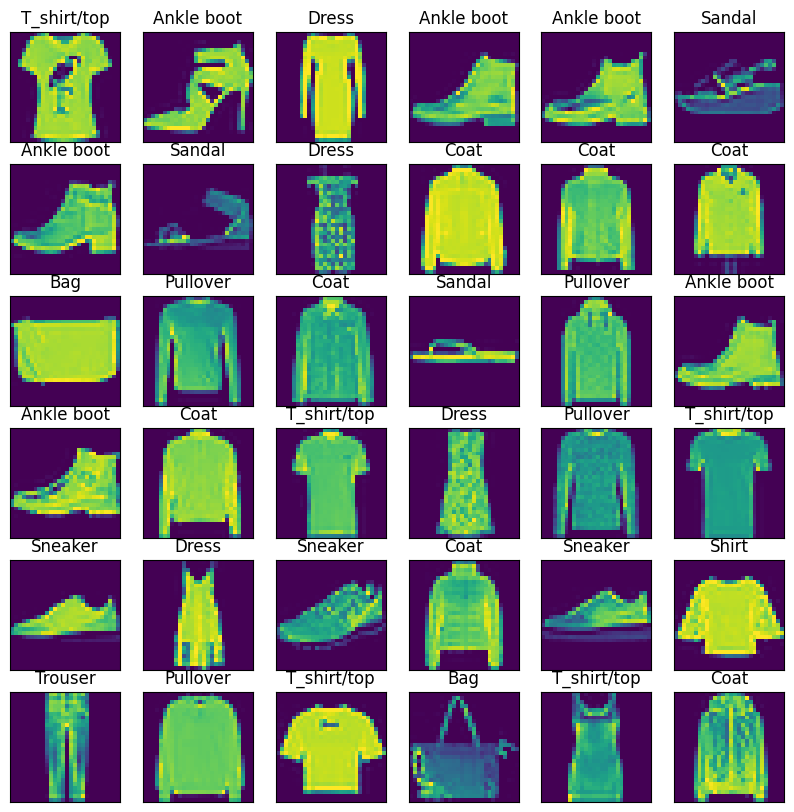

In [25]:
# plot some of the samples
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()


In [26]:
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1) 


# reshaping of the data
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_valid = x_valid.reshape(x_valid.shape[0],*image_shape)

In [27]:
x_train.shape,x_valid.shape,x_test.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [28]:
# Add a channel dimension for grayscale images
#x_train = np.expand_dims(x_train, axis=-1)
#x_valid = np.expand_dims(x_valid, axis=-1)
#x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train)
y_valid_categorical = tf.keras.utils.to_categorical(y_valid)
y_test_categorical = tf.keras.utils.to_categorical(y_test)


In [29]:
# Create data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Apply data augmentation to the training data
datagen.fit(x_train)

# Build model


CNN architecture
One convolution layer with 32 filters
"relu" activation
kernel is 3x3
we feed the nodes images of size 28x28
Pooling layer to downsize the image by a factor of 4 (makes the NN run faster)
Dropout of 0.2 in order to lightly regularize it
Dense layer of 32 nodes for computing
Dense layer of 10 nodes for the final classification of the labels




In [30]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                      

# Training the model

Train the model with data augmentation


In [39]:

history = model.fit(datagen.flow(x_train, y_train_categorical, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10,
                    validation_data=(x_valid, y_valid_categorical))

Epoch 1/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.5523 - accuracy: 0.7948 - val_loss: 0.3771 - val_accuracy: 0.8620
Epoch 2/10
1500/1500 [==============================] - 46s 30ms/step - loss: 0.5138 - accuracy: 0.8078 - val_loss: 0.4235 - val_accuracy: 0.8363
Epoch 3/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.4931 - accuracy: 0.8185 - val_loss: 0.4369 - val_accuracy: 0.8356
Epoch 4/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.4761 - accuracy: 0.8237 - val_loss: 0.3773 - val_accuracy: 0.8575
Epoch 5/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.4595 - accuracy: 0.8312 - val_loss: 0.3677 - val_accuracy: 0.8658
Epoch 6/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.4449 - accuracy: 0.8371 - val_loss: 0.4476 - val_accuracy: 0.8427
Epoch 7/10
1500/1500 [==============================] - 35s 24ms/step - loss: 0.4366 - accuracy: 0.8389 - val_loss: 0.3683 -


# Analysis of the results

Lets visualize how the trained model fairs under the validation and test set 


In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test_categorical)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.3401 - accuracy: 0.8703
Test loss: 0.34013238549232483
Test accuracy: 0.8702999949455261


Text(0.5, 1.0, 'Train - Accuracy')

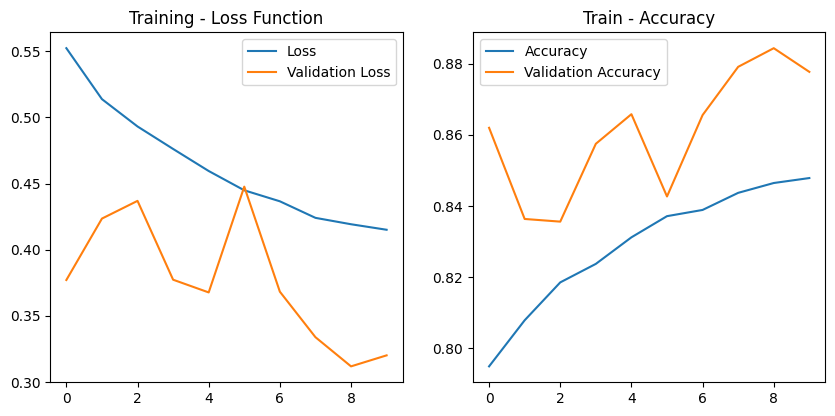

In [41]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [42]:
from sklearn.metrics import classification_report

predict_x = model.predict(x_test) 
predicted_classes = np.argmax(predict_x,axis=1)

num_classes = 10
target_names = ["{1} - Class {0}".format(i,class_names[i]) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

313/313 [==============================] - 3s 8ms/step
                       precision    recall  f1-score   support

T_shirt/top - Class 0       0.83      0.80      0.82      1000
    Trouser - Class 1       1.00      0.98      0.99      1000
   Pullover - Class 2       0.90      0.72      0.80      1000
      Dress - Class 3       0.89      0.89      0.89      1000
       Coat - Class 4       0.87      0.70      0.78      1000
     Sandal - Class 5       0.96      0.98      0.97      1000
      Shirt - Class 6       0.54      0.77      0.63      1000
    Sneaker - Class 7       0.96      0.91      0.94      1000
        Bag - Class 8       0.98      0.98      0.98      1000
 Ankle boot - Class 9       0.93      0.97      0.95      1000

             accuracy                           0.87     10000
            macro avg       0.89      0.87      0.87     10000
         weighted avg       0.89      0.87      0.87     10000



313/313 [==============================] - 3s 8ms/step


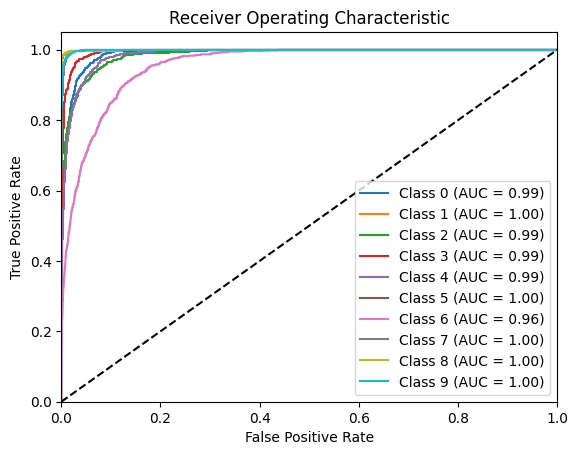

In [43]:
# Make predictions on the test set
y_pred = model.predict(x_test)3333333333333333333333333336
3
3
3

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_categorical[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

# Set plot properties
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


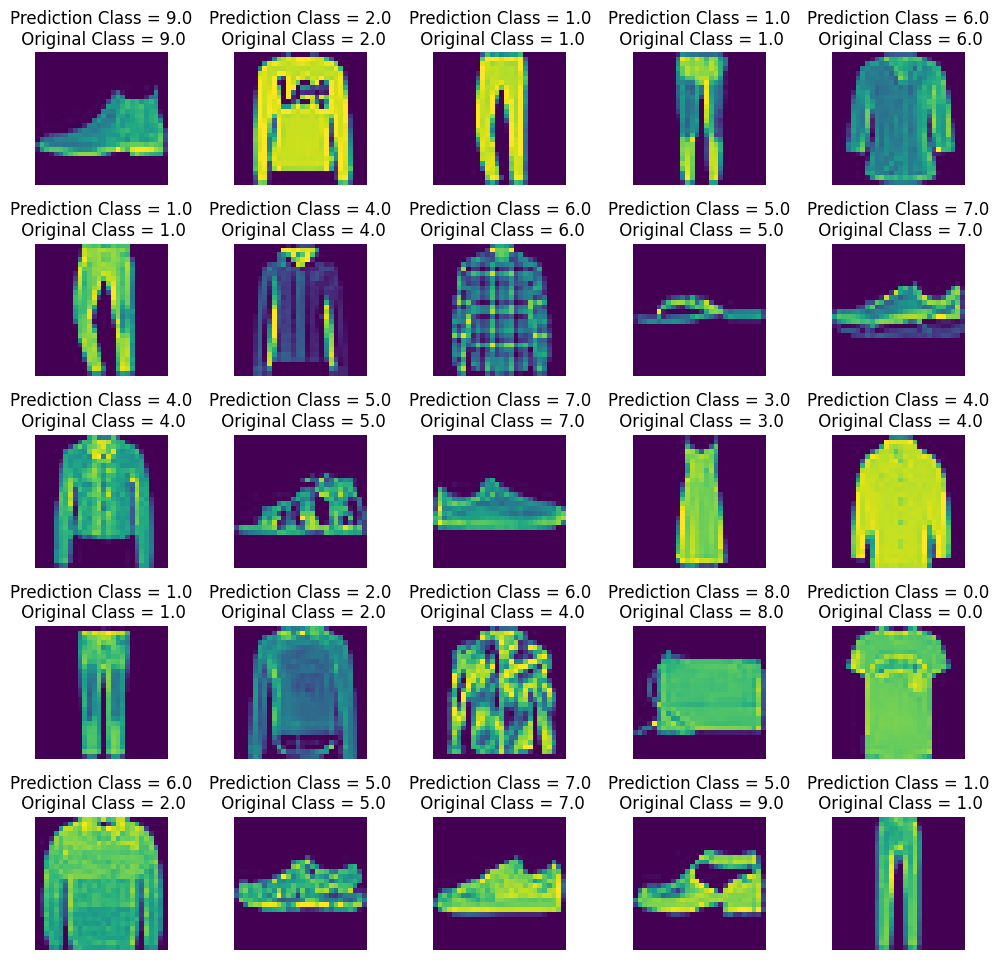

In [44]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# Image Recomendation using CNN fed KNN model 

1/1 [==============================] - 0s 191ms/step


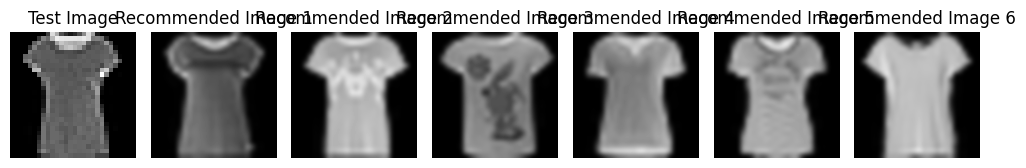

In [45]:
from sklearn.neighbors import NearestNeighbors
import random
from tensorflow.keras.preprocessing.image import load_img


# Extract features from the intermediate layer of the trained CNN model
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
train_features = intermediate_layer_model.predict(x_train)

# Train the KNN model using the extracted features
knn = NearestNeighbors(n_neighbors=6)  # We set n_neighbors to 6 to include the query image itself
knn.fit(train_features.reshape(train_features.shape[0], -1))

# Select a random test image for recommendation
random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]
test_feature = intermediate_layer_model.predict(np.expand_dims(test_image, axis=0))

# Flatten the test image
test_image_flat = test_image.reshape(1, -1)

# Find the K nearest neighbors for the test feature
distances, indices = knn.kneighbors(test_feature)

# Determine the number of recommended images
num_recommended = indices.shape[1]

# Plot the test image and its recommended images
plt.figure(figsize=(10, 10))

# Plot the test image
plt.subplot(2, num_recommended+1, 1)
plt.imshow(test_image, cmap='gray')
plt.title('Test Image')
plt.axis('off')

# Plot the recommended images
for i, index in enumerate(indices.flatten()):
    plt.subplot(2, num_recommended+1, i + 2)
    plt.imshow(x_train[index], cmap='gray',interpolation='bicubic')
    plt.title('Recommended Image {}'.format(i + 1))
    plt.axis('off')

plt.tight_layout()
plt.show()